<a href="https://colab.research.google.com/github/mgthw/mthudanghoc/blob/main/DS/forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> Bảng phân công công việc: </b>

| Họ Tên         | MSSV                  | % Hoàn Thành |
|-------------|------------------------------|------------------|
| Đặng Phương Thảo | 050610221313      | 100%           |
| Trần Ngọc Minh Thư | 050610220602     | 100%           |
| Lê Thị Yến Linh | 050610221030            | 100%           |

In [ ]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

<b><p style="font-size:16px">1. Tải file dữ liệu (có thể sử dụng code Python để tải hoặc tải bằng tay), nạp dữ liệu
từ file trên vào dataframe</b>

In [ ]:
# Cài đặt dữ liệu vào dataframe
df= pd.read_csv('btc_15m_data_2018_to_2024-2024-10-10.csv')
df

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,0,0,0,0,2018-01-01 00:00:00,13715.65,13715.65,13400.01,13556.15,123.616013,2018-01-01 00:14:59.999,1.675545e+06,1572,63.227133,8.576108e+05,0
1,1,1,1,1,2018-01-01 00:15:00,13533.75,13550.87,13402.00,13521.12,98.136430,2018-01-01 00:29:59.999,1.321757e+06,1461,47.686389,6.422812e+05,0
2,2,2,2,2,2018-01-01 00:30:00,13500.00,13545.37,13450.00,13470.41,79.904037,2018-01-01 00:44:59.999,1.078825e+06,1000,43.710406,5.900347e+05,0
3,3,3,3,3,2018-01-01 00:45:00,13494.65,13690.87,13450.00,13529.01,141.699719,2018-01-01 00:59:59.999,1.917783e+06,1195,73.897993,1.000614e+06,0
4,4,4,4,4,2018-01-01 01:00:00,13528.99,13571.74,13402.28,13445.63,72.537533,2018-01-01 01:14:59.999,9.778198e+05,898,34.257652,4.618369e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236998,236998,236998,236998,236998,2024-10-10 06:30:00,61059.99,61105.00,61058.00,61064.86,113.846280,2024-10-10 06:44:59.999000,6.954123e+06,16250,56.618640,3.458480e+06,0
236999,236999,236999,236999,236999,2024-10-10 06:45:00,61064.86,61149.58,61039.56,61143.85,190.041710,2024-10-10 06:59:59.999000,1.160895e+07,16920,81.787990,4.996370e+06,0
237000,237000,237000,237000,237000,2024-10-10 07:00:00,61143.86,61143.86,61079.44,61137.02,84.499960,2024-10-10 07:14:59.999000,5.163661e+06,10828,32.029050,1.957208e+06,0
237001,237001,237001,237001,237001,2024-10-10 07:15:00,61137.02,61145.99,61020.00,61020.01,78.775990,2024-10-10 07:29:59.999000,4.811728e+06,18665,30.924580,1.888847e+06,0


<b><p style="font-size:16px">2. Thực hiện thống kê mô tả dữ liệu</b>

In [ ]:
# Hiển thị một số thống kê cơ bản
print(df.describe())

# Tính toán các thống kê khác
mean_price = df['Close'].mean()
max_price = df['Close'].max()
min_price = df['Close'].min()

# Lưu dữ liệu vào file CSV
df.to_csv('btc_15m_data_2018_to_2024-2024-10-10.csv')

        Unnamed: 0.3   Unnamed: 0.2   Unnamed: 0.1     Unnamed: 0  \
count  237003.000000  237003.000000  237003.000000  237003.000000   
mean   118501.000000  118501.000000  118501.000000  118501.000000   
std     68417.017262   68417.017262   68417.017262   68417.017262   
min         0.000000       0.000000       0.000000       0.000000   
25%     59250.500000   59250.500000   59250.500000   59250.500000   
50%    118501.000000  118501.000000  118501.000000  118501.000000   
75%    177751.500000  177751.500000  177751.500000  177751.500000   
max    237002.000000  237002.000000  237002.000000  237002.000000   

                Open           High            Low          Close  \
count  237003.000000  237003.000000  237003.000000  237003.000000   
mean    26143.477153   26203.145700   26081.456259   26143.673574   
std     19605.161972   19647.220643   19561.437836   19605.278553   
min      3166.110000    3174.780000    3156.260000    3167.070000   
25%      8826.100000    8849.4450

<b><p style="font-size:16px">3. Làm sạch và phân tích tương quan giữa các đặc trưng trong dữ liệu</b>

In [ ]:
# Kiểm tra dữ liệu thiếu
print("Số lượng các giá trị dữ liệu bị thiếu trước khi làm sạch :")
print(df.isna().sum())

# Xóa các dòng có giá trị thiếu
df_cleaned = df.dropna()

# Kiểm tra lại số lượng giá trị thiếu sau khi làm sạch
print("Số lượng các giá trị dữ liệu bị thiếu sau khi làm sạch:")
print(df_cleaned.isna().sum())

#kiểm tra giá trị bị trùng lặp
print("Số lượng các giá trị dữ liệu trùng lặp trước khi làm sạch:")
print(df_cleaned.duplicated().sum())

#loại bỏ dữ liệu trùng lặp
df_cleaned=df_cleaned.drop_duplicates()


## Kiểm tra lại số lượng dòng trùng lặp sau khi làm sạch
print("Số lượng các giá trị dữ liệu trùng lặp sau khi làm sạch:")
print(df_cleaned.duplicated().sum())

Số lượng các giá trị dữ liệu bị thiếu trước khi làm sạch :
Unnamed: 0.3                    0
Unnamed: 0.2                    0
Unnamed: 0.1                    0
Unnamed: 0                      0
Open time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
Ignore                          0
dtype: int64
Số lượng các giá trị dữ liệu bị thiếu sau khi làm sạch:
Unnamed: 0.3                    0
Unnamed: 0.2                    0
Unnamed: 0.1                    0
Unnamed: 0                      0
Open time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                

Unnamed: 0.3                      int64
Unnamed: 0.2                      int64
Unnamed: 0.1                      int64
Unnamed: 0                        int64
Open time                        object
Open                            float64
High                            float64
Low                             float64
Close                           float64
Volume                          float64
Close time                       object
Quote asset volume              float64
Number of trades                  int64
Taker buy base asset volume     float64
Taker buy quote asset volume    float64
Ignore                            int64
dtype: object
   Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0      Open      High  \
0             0             0             0           0  13715.65  13715.65   
1             1             1             1           1  13533.75  13550.87   
2             2             2             2           2  13500.00  13545.37   
3             3             3 

      Close  Close_target
0  13556.15             0
1  13521.12             0
2  13470.41             1
3  13529.01             0
4  13445.63             1
5  13560.00             0
6  13440.01             0
7  13203.06             1
8  13387.00             0
9  13225.00             1

Ma trận tương quan:
                  Open     Close      High       Low    Volume  Close_target
Open          1.000000  0.999983  0.999989  0.999986 -0.061786     -0.006100
Close         0.999983  1.000000  0.999990  0.999989 -0.061876     -0.006325
High          0.999989  0.999990  1.000000  0.999977 -0.060601     -0.006166
Low           0.999986  0.999989  0.999977  1.000000 -0.063210     -0.006215
Volume       -0.061786 -0.061876 -0.060601 -0.063210  1.000000      0.004936
Close_target -0.006100 -0.006325 -0.006166 -0.006215  0.004936      1.000000


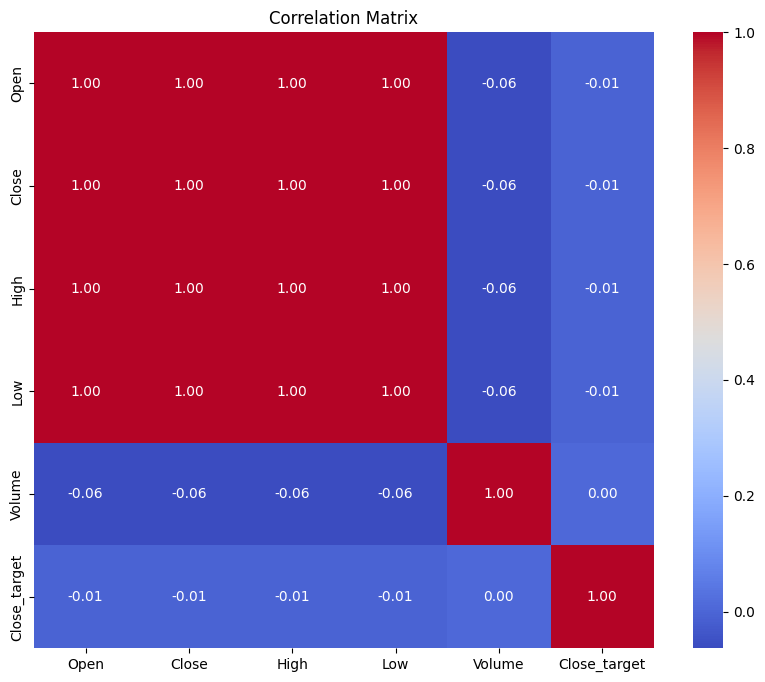


Hệ số tương quan của các biến đặc trưng với biến mục tiêu:
Open     -0.006100
Close    -0.006325
High     -0.006166
Low      -0.006215
Volume    0.004936
Name: Close_target, dtype: float64


In [ ]:
# Kiểm tra kiểu dữ liệu
print(df.dtypes)

# Hiển thị các cột có kiểu dữ liệu số
numeric_df = df.select_dtypes(include=['float64', 'int64'])
print(numeric_df.head())

# Chuyển thành dữ liệu số cho các cột cần thiết nếu có
for col in ['Open', 'Close', 'High', 'Low','Volume']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Tạo biến mục tiêu nhị phân (giá tăng hoặc giá giảm) từ cột `close`
df['Close_target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Loại bỏ các hàng có giá trị NaN do sử dụng hàm shift
df = df.dropna(subset=['Close', 'Close_target'])

# Kiểm tra biến mục tiêu
if 'Close_target' in df.columns:
    print(df[['Close', 'Close_target']].head(10))
else:
    print("Không thể tạo biến mục tiêu vì thiếu cột 'Close'.")

# Loại bỏ các cột không phải là dữ liệu số và cột mục tiêu
df_numeric = df[['Open', 'Close', 'High', 'Low','Volume', 'Close_target']].dropna()

# Phân tích tương quan
Correlation_matrix = df_numeric.corr()

# In ra ma trận tương quan
print("\nMa trận tương quan:")
print(Correlation_matrix)

# Vẽ biểu đồ heatmap để trực quan hóa tương quan
plt.figure(figsize=(10, 8))
# Use 'Correlation_matrix' instead of 'correlation_matrix'
sns.heatmap(Correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Lấy hệ số tương quan của các biến đặc trưng với biến mục tiêu
Correlation_with_target = Correlation_matrix['Close_target'].drop('Close_target')

# In ra hệ số tương quan của các biến đặc trưng với biến mục tiêu
print("\nHệ số tương quan của các biến đặc trưng với biến mục tiêu:")
print(Correlation_with_target)

<b><p style="font-size:16px">4. Đánh giá mức độ quan trọng về mặt thông tin của các đặc trưng và lựa chọn các
đặc trưng đưa vào huấn luyện mô hình học máy</b>

Mean Squared Error: 0.2495145321400903
R-squared: 0.0019228374511853774
Mức độ quan trọng của các đặc trưng:
  Feature  Importance
1    High    3.785006
2     Low    2.597927
0    Open    0.380606
4  Volume    0.000439
3   Close   -6.766468


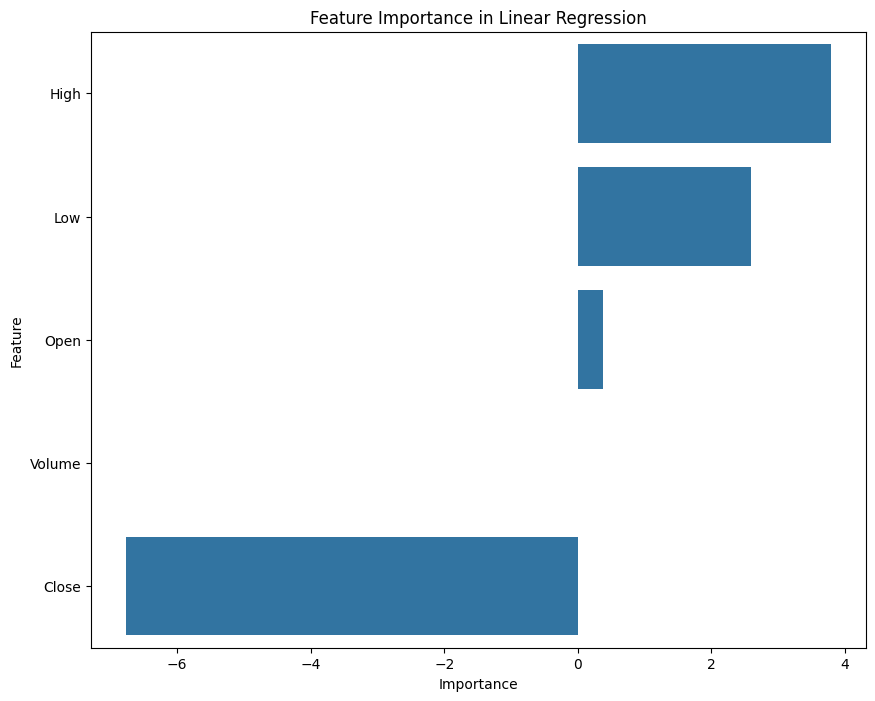

Các đặc trưng quan trọng nhất:
1     High
2      Low
0     Open
3    Close
Name: Feature, dtype: object


In [ ]:
# Lựa chọn các đặc trưng và biến mục tiêu
X = df[['Open', 'High', 'Low','Close', 'Volume']]
y = df['Close_target']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

# Đánh giá mức độ quan trọng của các đặc trưng thông qua hệ số hồi quy
coefficients = model.coef_
features = X.columns
importance = pd.DataFrame({'Feature': features, 'Importance': coefficients})
importance = importance.sort_values(by='Importance', ascending=False)

# In ra mức độ quan trọng của các đặc trưng
print("Mức độ quan trọng của các đặc trưng:")
print(importance)

# Vẽ biểu đồ thanh để trực quan hóa mức độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance in Linear Regression')
plt.show()

# Lựa chọn các đặc trưng quan trọng nhất (dựa trên mức độ quan trọng)
selected_features = importance[importance['Importance'].abs() > 0.1]['Feature']
print("Các đặc trưng quan trọng nhất:")
print(selected_features)


<b><p style="font-size:16px">5. Huấn luyện mô hình dự đoán giá BTC</b>

In [ ]:
# Chọn đặc trưng đầu vào và giá mục tiêu
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']  # Dự đoán giá thực thay vì phân loại

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu đầu vào
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# In kết quả dự đoán giá theo ngày
results = pd.DataFrame({
    'Open time': df.loc[y_test.index, 'Open time'],  # Sử dụng y_test.index để lấy Open time
    'Actual Price': y_test,
    'Predicted Price': y_pred
})

# Chuyển đổi cột 'Open time' sang định dạng datetime
results['Open time'] = pd.to_datetime(results['Open time'], errors='coerce')

# Kiểm tra giá trị trong cột 'Open time'
if results['Open time'].isnull().any():
    print("Cảnh báo: Có giá trị NaT trong cột 'Open time' của kết quả.")

# Định dạng giá thành tiền Việt Nam (VND)
results['Actual Price'] = results['Actual Price'].apply(lambda x: f"{x:,.0f} VNĐ")
results['Predicted Price'] = results['Predicted Price'].apply(lambda x: f"{x:,.0f} VNĐ")

# Sắp xếp theo thời gian
results = results.sort_values('Open time').reset_index(drop=True)

# Hiển thị kết quả
print("Kết quả dự đoán giá theo ngày:")
print(results)

Kết quả dự đoán giá theo ngày:
                Open time Actual Price Predicted Price
0     2018-01-01 01:00:00   13,446 VNĐ      13,473 VNĐ
1     2018-01-01 01:30:00   13,440 VNĐ      13,469 VNĐ
2     2018-01-01 02:45:00   13,330 VNĐ      13,345 VNĐ
3     2018-01-01 03:00:00   13,445 VNĐ      13,395 VNĐ
4     2018-01-01 05:30:00   13,580 VNĐ      13,564 VNĐ
...                   ...          ...             ...
47396 2024-10-10 01:15:00   60,618 VNĐ      60,637 VNĐ
47397 2024-10-10 03:45:00   60,865 VNĐ      60,894 VNĐ
47398 2024-10-10 04:30:00   60,916 VNĐ      60,904 VNĐ
47399 2024-10-10 05:00:00   60,872 VNĐ      60,874 VNĐ
47400 2024-10-10 07:15:00   61,020 VNĐ      61,055 VNĐ

[47401 rows x 3 columns]


<b><p style="font-size:16px">6. Đánh giá mô hình</b>

In [ ]:
# Dự đoán trên tập huấn luyện
y_train_pred = model.predict(X_train_scaled)

# Dự đoán trên tập kiểm tra
y_test_pred = model.predict(X_test_scaled)

# Tính toán các chỉ số đánh giá trên tập huấn luyện
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Tính toán các chỉ số đánh giá trên tập kiểm tra
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# In kết quả đánh giá
print("\nHiệu suất mô hình trên tập huấn luyện:")
print("--------------------------------------")
print(f'RMSE: {train_rmse}')
print(f'R² score: {train_r2}')

print("\nHiệu suất mô hình trên tập kiểm tra:")
print("--------------------------------------")
print(f'RMSE: {test_rmse}')
print(f'R² score: {test_r2}')



Hiệu suất mô hình trên tập huấn luyện:
--------------------------------------
RMSE: 50.96632118339443
R² score: 0.9999932442832706

Hiệu suất mô hình trên tập kiểm tra:
--------------------------------------
RMSE: 50.23326261077882
R² score: 0.9999934256425059
